# M31_WR_AJR.ipynb

In [1141]:
#from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astropy import coordinates
import astropy.units as u
import numpy as np
from matplotlib.pylab import *
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


### Data Processing###

In [2]:
file = open('WF_Neugent.txt', 'r') # Processing the file from Neugent paper
neugent= []
for line in file:
    words = line.split()
#     print(words)
    neugent.append(words)
# 153 in total

In [3]:
neugent[126]

['J004502.78+415533.7',
 '0.50',
 'WN5pec',
 '20.14',
 '-0.22',
 '-4.9',
 '53',
 'New']

In [ ]:
# WF_475 = []
count = 0
for i in range(len(neugent)):
    cor =neugent[i][0]
    cor_search = cor[1:3] + 'h' + cor[3:5] + 'm' + cor[5:10] +'s' + ' ' + cor[10:13] +'d' + cor[13:15] +'m' + cor[15:] +'s'
    c = coordinates.SkyCoord(cor_search, frame='icrs')
    data = Catalogs.query_region(c, catalog="HSC", radius = 0.3*u.arcsecond) #0.5 - ???
#     print(i)
    if 'A_F475W' in data.keys():
        count +=1
#         WF_475.append(i)
    df = data.to_pandas()
    print(df.iloc[:,20::3])
    print('\n')
# print(count)

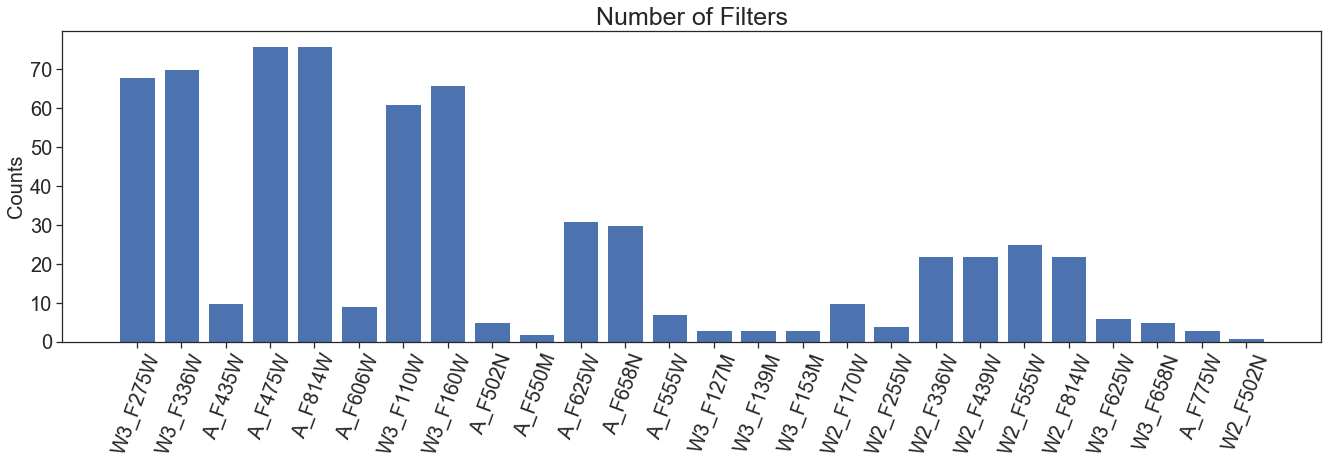

In [1145]:
# data_full = pd.DataFrame(columns=HSC_filters['Label']) # Make sure this df includes the filters we're interested in
# count = {}
# for i in range(len(WF_475)): #74 stars have 475W filters
#     cor =neugent[WF_475[i]][0] 
#     cor_search = cor[1:3] + 'h' + cor[3:5] + 'm' + cor[5:10] +'s' + ' ' + cor[10:13] +'d' + cor[13:15] +'m' + cor[15:] +'s'
#     c = coordinates.SkyCoord(cor_search, frame='icrs')
#     data = Catalogs.query_region(c, catalog="HSC", radius = 0.5*u.arcsecond)
#     df = data.to_pandas()
#     fc = df.keys()
#     for key in fc:
#         if key in count.keys():
#             count[key] += 1
#         else:
#             count[key] = 1
        
filters = list(count.keys())
counts = list(count.values())

figure(figsize=(19,7))
bar(filters[20::3],counts[20::3])
yticks(fontsize=20)
xticks(rotation=70, fontsize=20)
title('Number of Filters', fontsize=25)
ylabel('Counts', fontsize=20)
tight_layout()
savefig('filtercount.png', dpi=200)
show()


In [4]:
WF_475 = np.array(np.loadtxt('WF_475.txt'), dtype=int) #Loading the stars with 475W filter

In [1356]:
rcParams.update({'font.size': 25})

In [528]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [1537]:
data_full = pd.DataFrame(columns=HSC_filters['Label']) # Make sure this df includes the filters we're interested in
for i in range(len(WF_475)): #74 stars have 475W filters
    cor =neugent[WF_475[i]][0] 
    cor_search = cor[1:3] + 'h' + cor[3:5] + 'm' + cor[5:10] +'s' + ' ' + cor[10:13] +'d' + cor[13:15] +'m' + cor[15:] +'s'
    c = coordinates.SkyCoord(cor_search, frame='icrs')
    
    if i % 5==0:
        print('Done with:', i)
    for r in [3]:
        data = Catalogs.query_region(c, catalog="HSC", radius = r*u.arcsecond)
        df = data.to_pandas()

        WF_pos = np.argmin(abs(df['A_F475W'] - double(neugent[WF_475[i]][3]))) #locate the WF star
        label = np.zeros(len(data), int) # label
        pos = np.zeros(len(data), int) # position in 150 star
        ra = np.zeros(len(data)) # ra 
        dec = np.zeros(len(data)) # dec
        Va = np.zeros(len(data)) # Va
        B_Va = np.zeros(len(data)) # B-Va
#         print(WF_pos)
        if r ==0.5:
            ra[WF_pos] = double(c.to_string('decimal').split(' ')[0])
            dec[WF_pos] = double(c.to_string('decimal').split(' ')[1])
            Va[WF_pos] = double(neugent[WF_475[i]][3])
            B_Va[WF_pos] = double(neugent[WF_475[i]][4])
            label[WF_pos] = 1
            pos[:] = WF_475[i]

        df['NeugentRA'] = ra
        df['NeugentDec'] = dec
        df['Va'] = Va
        df['B_Va'] = B_Va
        df['Label'] = label
        df['Position'] = pos
        fc = df.keys()
        if 'W3_F275W' in fc and 'W3_F336W' in fc and 'A_F475W' in fc and 'A_F814W' in fc and 'W3_F110W' in fc and 'W3_F160W' in fc:
            data_full = pd.concat([data_full,df], axis=0, join='inner')
    #         ID_6[WF_475[i]] = int(df.iloc[WF_pos]['MatchID']) 
data = data_full.drop_duplicates(subset='MatchID').dropna()

Done with: 0
Done with: 5
Done with: 10
Done with: 15
Done with: 20
Done with: 25
Done with: 30
Done with: 35
Done with: 40
Done with: 45
Done with: 50
Done with: 55
Done with: 60
Done with: 65
Done with: 70
Done with: 75


In [1538]:
len(np.array(np.where(data_6allstar['Label']==1)[0]))

48

In [1542]:
# data_6allstar.to_csv('data_6allstar0.5-1-4.csv', index =False)
# data = data_6allstar.copy()
data = pd.read_csv('data_6allstar0.5-1-4.csv')
data.describe()


,Label,Position,NeugentRA,NeugentDec,Va,B_Va,A_F475W,A_F475W_MAD,A_F475W_N,A_F814W,A_F814W_MAD,A_F814W_N,CI,CI_Sigma,DSigma,Distance,Extinction,KronRadius,KronRadius_Sigma,MatchDec,MatchID,MatchRA,NumFilters,NumImages,NumVisits,W3_F110W,W3_F110W_MAD,W3_F110W_N,W3_F160W,W3_F160W_MAD,W3_F160W_N,W3_F275W,W3_F275W_MAD,W3_F275W_N,W3_F336W,W3_F336W_MAD,W3_F336W_N
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.0000,205.000000,205.000000,205.000000
mean,0.234146,27.034146,2.621506,9.730569,4.793317,-0.009659,21.477433,0.015157,2.463415,21.607817,0.022899,3.004878,1.214228,0.303636,24.192135,0.032960,0.346102,0.309860,0.213415,41.506689,5.647167e+07,11.174019,8.619512,15.102439,6.385366,21.278644,0.004144,1.058537,21.566741,0.007706,1.078049,22.016564,0.010356,1.4000,21.748014,0.008154,1.409756
std,0.424501,50.241318,4.753683,17.641754,8.699445,0.133054,1.163224,0.014670,0.572985,1.143694,0.028210,1.036101,0.188264,0.166304,15.587614,0.022177,0.095932,0.058454,0.073170,0.248229,3.085654e+07,0.166697,2.135510,4.360500,2.108057,1.139339,0.024862,0.235330,1.141873,0.046460,0.268905,1.408029,0.022900,0.5566,1.321106,0.019032,0.558273
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.460000,18.388000,0.000000,2.000000,18.077149,0.000000,1.000000,0.940764,0.037481,1.157781,0.001358,0.118755,0.219700,0.057255,41.164465,1.771960e+05,10.853919,6.000000,8.000000,3.000000,16.305201,0.000000,1.000000,15.923800,0.000000,1.000000,18.189400,0.000000,1.0000,18.120900,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.699500,0.004000,2.000000,20.971300,0.007099,2.000000,1.088068,0.170834,11.099021,0.009831,0.262869,0.268029,0.160904,41.345670,3.074957e+07,11.084087,7.000000,12.000000,5.000000,20.714300,0.000000,1.000000,20.960800,0.000000,1.000000,21.028700,0.000000,1.0000,20.825600,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.472000,0.009951,2.000000,21.711500,0.014950,3.000000,1.157131,0.276763,21.611510,0.033299,0.338179,0.298457,0.204153,41.467570,5.992842e+07,11.179393,8.000000,14.000000,6.000000,21.403299,0.000000,1.000000,21.632799,0.000000,1.000000,21.975000,0.000000,1.0000,21.747000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.350500,0.022200,3.000000,22.486700,0.027451,4.000000,1.293275,0.413092,33.648381,0.054300,0.440653,0.335225,0.256534,41.626374,8.216406e+07,11.275666,10.000000,18.000000,7.000000,21.972401,0.000000,1.000000,22.255800,0.000000,1.000000,23.166300,0.010350,2.0000,22.783899,0.007501,2.000000
max,1.000000,153.000000,11.732900,42.217000,21.820000,0.590000,23.858550,0.088999,4.000000,23.677500,0.231501,5.000000,1.954782,0.791842,71.783068,0.065838,0.474245,0.526263,0.442420,42.216983,1.079160e+08,11.732863,14.000000,29.000000,12.000000,23.774300,0.277350,2.000000,24.167000,0.446051,2.000000,24.481501,0.152700,4.0000,24.344851,0.161050,4.000000


In [ ]:
# # Save 
# np.save('filter_count.npy', keys) 
# # Load
# filter_count = np.load('filter_count.npy',allow_pickle='TRUE').item()
# ID_6 = np.array(data_full['MatchID'], dtype= int)
# np.savetxt('ID_6.txt', ID_6)
# data_full.to_csv('WF_star_6.csv')

In [829]:
# W336_W475 = data['W3_F336W'] - data['A_F475W']
# W475_W814 = data['A_F475W'] - data['A_F814W']
# W336_W814 = data['W3_F336W'] - data['A_F814W']

# fig1 = plt.figure(figsize=(7,5))
# #plt.plot(g_r,r_i,'o')
# plt.scatter(W336_W475,W475_W814,s=30,c=data['Label'],cmap='rainbow', alpha=0.6)
# # plt.scatter(W336_W475,W475_W814,s=20,c=W336_W814,cmap='rainbow')
# # plt.colorbar()
# # axes().set_aspect('equal')
# # plt.xlim(0.1,1.9)
# # plt.ylim(0.1,0.7)
# plt.xlabel('$W336 - W475$ [mag]')
# plt.ylabel('$W475 - W814$ [mag]')
# plt.title('HSC of WR and non-WR stars')
# plt.tick_params('both', length=12, width=1.3, which='major')


In [1543]:
# WR_stars = data.iloc[np.where(data['Label']==1)[0],:] # WR stars only
# data.iloc[:,[0, 26,29,32,35,38,41]].head()
filters = ['A_F475W','W3_F275W' ,'W3_F336W', 'A_F814W' , 'W3_F110W' ,'W3_F160W'] 

In [828]:
# figure(figsize=(20,15))
# for i in range(5):
#     subplot(3,3,i+1)
#     y = data['A_F475W'] - data[filters[i]]
#     x = data[filters[i]]
#     scatter(x, y, c=data['Label'], cmap='rainbow', alpha=0.6, s=40)
#     xlabel(filters[i], fontsize=20)
#     ylabel(filters[i] + ' - A_F475W', fontsize=20)
#     xticks(fontsize=15)
#     yticks(fontsize=15)
# tight_layout()

In [1067]:
data_filters = data.loc[:,['Label','A_F475W','W3_F275W' ,'W3_F336W', 'A_F814W' , 'W3_F110W', 'W3_F160W']]
data_filters.head()

,Label,A_F475W,W3_F275W,W3_F336W,A_F814W,W3_F110W,W3_F160W
0,1,21.03190,20.954300,20.8256,21.52590,21.595501,22.202900
0,1,21.14035,21.144300,21.1038,21.71735,21.358299,21.379299
0,1,20.22865,20.680551,20.4291,20.44455,20.173700,20.548901
27,0,22.40645,23.153950,22.7896,22.02030,20.944901,20.742001
57,0,20.95765,21.378500,21.1133,21.16925,20.822001,20.928900


In [1544]:
data_colors = pd.DataFrame()
data_colors['Label'] = data['Label']
for i in range(6):
    if filters[i] != 'A_F475W':
        data_colors[filters[0]+ ' - ' + filters[i]] = data[filters[0]] - data[filters[i]]
#     data_colors['A_F475W'] = data['A_F475W']

In [1545]:
data_colors.iloc[:,1:].head()

,A_F475W - W3_F275W,A_F475W - W3_F336W,A_F475W - A_F814W,A_F475W - W3_F110W,A_F475W - W3_F160W
0,0.077600,0.206301,-0.493999,-0.563601,-1.171000
1,-0.003950,0.036551,-0.577000,-0.217949,-0.238949
2,-0.451900,-0.200450,-0.215899,0.054950,-0.320251
3,-0.747499,-0.383150,0.386150,1.461550,1.664450
4,-0.420850,-0.155650,-0.211599,0.135650,0.028750


In [1343]:
# import seaborn as sns; 
# sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(data_colors, hue="Label")
# savefig('seapair6x6.png', dpi=200)
# show()

### KNN with 6 filters ###

In [1312]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(data_colors.iloc[:,1:],np.array(data['Label'], dtype=int))
# model.fit(data_filters.iloc[:,1:],np.array(data['Label'], dtype=int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [1313]:
y_pred = model.predict(data_colors.iloc[:,1:])
knn_pred = data_colors.copy()

# y_pred = model.predict(data_filters.iloc[:,1:])
# knn_pred = data_filters.copy()

knn_pred['Label'] = y_pred
print("Accuracy:",metrics.accuracy_score(np.array(data['Label'], dtype=int), y_pred))

Accuracy: 0.8634146341463415


              precision    recall  f1-score   support

           0       0.88      0.95      0.91       157
           1       0.78      0.58      0.67        48

    accuracy                           0.86       205
   macro avg       0.83      0.77      0.79       205
weighted avg       0.86      0.86      0.86       205



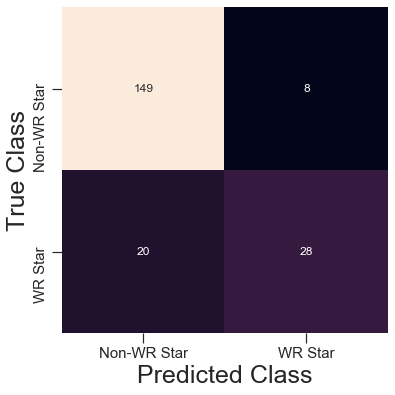

In [1314]:
print(classification_report(np.array(data['Label'], dtype=int), y_pred))
mat = confusion_matrix(np.array(data['Label'], dtype=int), y_pred)
fig1c = plt.figure(figsize=(6,6))
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', xticklabels=['Non-WR Star','WR Star'], 
            yticklabels=['Non-WR Star', 'WR Star'])
plt.xlabel('Predicted Class', fontsize=25)
plt.ylabel('True Class', fontsize=25)
plt.tick_params('both', length=10, width=1.2, which='major', labelsize=15)
savefig('KNN_filters.png', dpi=200)
show()

In [1277]:
# sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(knn_pred, hue="Label")
# show()

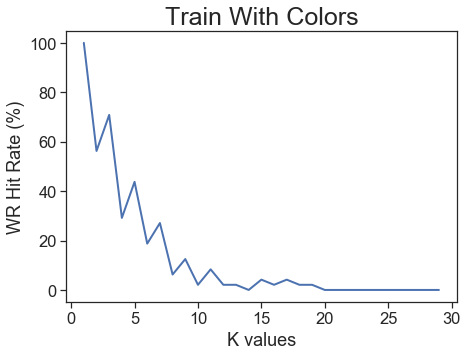

In [1295]:
WR_star48 = []
# Calculating error for K values between 1 and 40
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_colors.iloc[:,1:], np.array(data['Label'], dtype=int))
    pred_i = knn.predict(data_colors.iloc[:,1:])
    mati = confusion_matrix(np.array(data['Label'], dtype=int), pred_i)

    WR_star48.append(mati[1,1]/len(np.where(np.array(data['Label'])==1)[0])*100)
figure(figsize=(7,5))
plot(range(1,30),WR_star48, linewidth=2)
xlabel('K values')
ylabel('WR Hit Rate (%)')
title('Train With Colors', fontsize=25)
savefig('KNN_hitrate.png', dpi=200)
show()

### SVM with 6 filters ###

In [1546]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(data_colors.iloc[:,1:], np.array(data['Label'], dtype=int), test_size=0.4,random_state=302)
# X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,26::3], np.array(data['Label'], dtype=int), test_size=0.4,random_state=302)

In [1219]:
#Import svm model
from sklearn import svm
x_train = data_colors.iloc[:,1:]
# x_train = data_filters.iloc[:,1:]
y_train =  np.array(data['Label'], dtype=int)

#Create a svm Classifier
clf = svm.SVC(kernel='poly')
#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_train)

In [1220]:
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy: how often is the classifier correyct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.7658536585365854


In [1221]:
# name = np.empty(len(y_pred), dtype=str)
# pred = pd.Series(np.empty(len(y_pred), dtype=str))
# pred[np.where(y_pred == 0)[0]] = 'Non-WR Star'
# pred[np.where(y_pred == 1)[0]] = 'WR Star'
# true = pd.Series(np.empty(len(y_pred), dtype=str))
# true[np.where(np.array(data['Label'])==1)[0]] = 'WR Star'
# true[np.where(np.array(data['Label'])==0)[0]] = 'Non-WR Star'

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.77      1.00      0.87       157
           1       0.00      0.00      0.00        48

    accuracy                           0.77       205
   macro avg       0.38      0.50      0.43       205
weighted avg       0.59      0.77      0.66       205



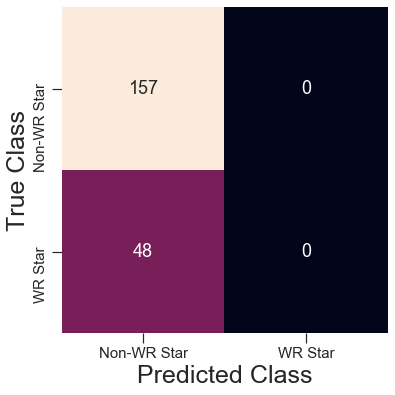

In [1222]:
print(classification_report(np.array(data['Label'], dtype=int), y_pred))

mat = confusion_matrix(np.array(data['Label'], dtype=int), y_pred)
fig1c = plt.figure(figsize=(6,6))
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt = 'd', xticklabels=['Non-WR Star','WR Star'], 
            yticklabels=['Non-WR Star', 'WR Star'])
plt.xlabel('Predicted Class', fontsize=25)
plt.ylabel('True Class', fontsize=25)
plt.tick_params('both', length=10, width=1.2, which='major', labelsize=15)
savefig('SVM_filters.png', dpi=200)
show()


### Random Forest ###

In [1657]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data_colors.iloc[:,1:], np.array(data['Label'], dtype=int), test_size=0.3, random_state=300)
# X_train, X_test, y_train, y_test = train_test_split(data_filters.iloc[:,1:], np.array(data['Label'], dtype=int), test_size=0.4,random_state=300)

In [1658]:
clf=RandomForestClassifier(n_estimators=5)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

# clf=RandomForestClassifier(n_estimators=5)
# clf.fit(data_colors.iloc[:,1:], np.array(data['Label'], dtype=int))
# y_pred=clf.predict(data_colors.iloc[:,1:])

              precision    recall  f1-score   support

           0       0.72      0.89      0.80        44
           1       0.38      0.17      0.23        18

    accuracy                           0.68        62
   macro avg       0.55      0.53      0.51        62
weighted avg       0.62      0.68      0.63        62



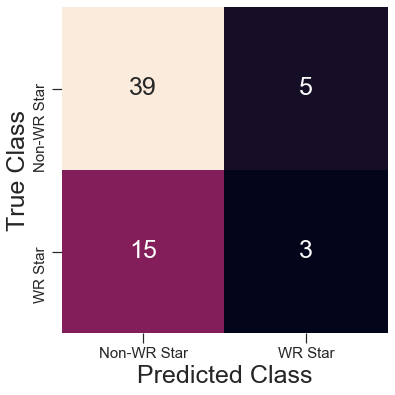

In [1659]:
# print(classification_report(np.array(data['Label'], dtype=int), y_pred))

# mat = confusion_matrix(np.array(data['Label'], dtype=int), y_pred)
# fig1c = plt.figure(figsize=(6,6))
# sns.heatmap(mat, square=True, annot=True, cbar=False, fmt = 'd', xticklabels=['Non-WR Star','WR Star'], 
#             yticklabels=['Non-WR Star', 'WR Star'])
# plt.xlabel('Predicted Class', fontsize=25)
# plt.ylabel('True Class', fontsize=25)
# plt.tick_params('both', length=10, width=1.2, which='major', labelsize=15)
# savefig('RandomF_filters.png', dpi=200)
# show()


print(classification_report(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
fig1c = plt.figure(figsize=(6,6))
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt = 'd', xticklabels=['Non-WR Star','WR Star'], 
            yticklabels=['Non-WR Star', 'WR Star'])
plt.xlabel('Predicted Class', fontsize=25)
plt.ylabel('True Class', fontsize=25)
plt.tick_params('both', length=10, width=1.2, which='major', labelsize=15)
savefig('RandomF_filters.png', dpi=200)
show()

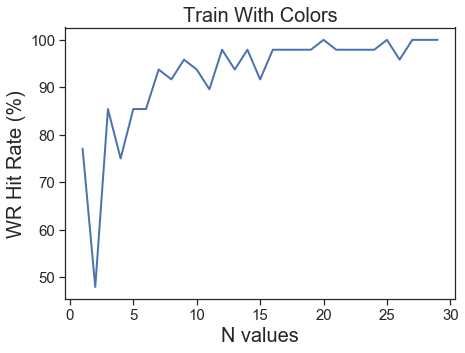

In [1611]:
WR_star48 = []
# Calculating error for K values between 1 and 40
for i in range(1, 30):
    clf=RandomForestClassifier(n_estimators=i)
    clf.fit(data_colors.iloc[:,1:], np.array(data['Label'], dtype=int))
    pred_i=clf.predict(data_colors.iloc[:,1:])
    mati = confusion_matrix(np.array(data['Label'], dtype=int), pred_i)

    WR_star48.append(mati[1,1]/len(np.where(np.array(data['Label'])==1)[0])*100)
figure(figsize=(7,5))
plot(range(1,30),WR_star48, linewidth=2)
xlabel('N values', fontsize=20)
ylabel('WR Hit Rate (%)', fontsize=20)
title('Train With Colors', fontsize=20)
xticks(fontsize=15)
yticks(fontsize=15)
savefig('RandomF_hitrate.png', dpi=200)
show()

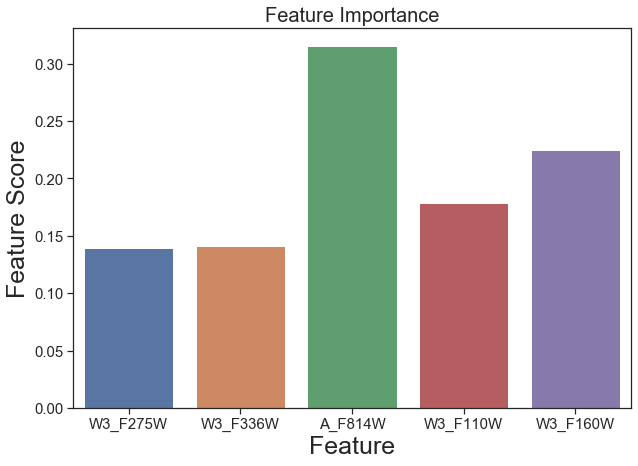

In [1610]:
figure(figsize=(10,7))
feature= ['W3_F275W' ,'W3_F336W', 'A_F814W' , 'W3_F110W', 'W3_F160W']
sns.barplot(feature, clf.feature_importances_)
yticks(fontsize=15)
xticks(fontsize=15)
ylabel('Feature Score', fontsize=25)
xlabel('Feature', fontsize=25)
title('Feature Importance', fontsize=20)
savefig('Feature.png', dpi=200)

In [1340]:
data_colors.columns[1::]

Index(['A_F475W - W3_F275W', 'A_F475W - W3_F336W', 'A_F475W - A_F814W',
       'A_F475W - W3_F110W', 'A_F475W - W3_F160W'],
      dtype='object')

In [1109]:
# import seaborn as sns; 
# data_pred = data.copy()
# data_pred['Label'] = y_pred
# sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(data_trained, hue="Label")
# savefig('trained_model6x6.png', dpi=200)
# show()

In [1110]:
# WR_pred = np.where(data_pred['Label']==1)[0]
# RA_pred = data['MatchRA'].iloc[WR_pred]
# Dec_pred = data['MatchDec'].iloc[WR_pred]

# WR_test = np.where(data['Label']==1)[0]
# RA_test = data['MatchRA'].iloc[WR_test]
# Dec_test = data['MatchDec'].iloc[WR_test]

# figure(figsize=(18,8))

# subplot(121)
# plot(RA_pred, Dec_pred ,'*',color='r', markersize=20)#, alpha=0.5)
# xticks(fontsize=15)
# yticks(fontsize=15)
# xlabel('RA', fontsize=20)
# xlim([10.7, 12])
# ylim([41,42.3])
# title('Predicted WR Stars', fontsize=25)

# subplot(122)
# plot(RA_test, Dec_test ,'*',color='b', markersize=20)#, alpha=0.5)
# xlim([10.7, 12])
# ylim([41,42.3])
# xticks(fontsize=15)
# yticks(fontsize=15)
# xlabel('RA', fontsize=20)
# title('Neugent WR Stars', fontsize=25)
# tight_layout()
# show()

### PCA of 6 filters ###

In [1385]:
from sklearn.decomposition import PCA
pca = PCA(2)
projected_color = pca.fit_transform(data_colors.iloc[:,1:])
projected_filter = pca.fit_transform(data_filters.iloc[:,1:])

print(projected.shape)

(205, 2)


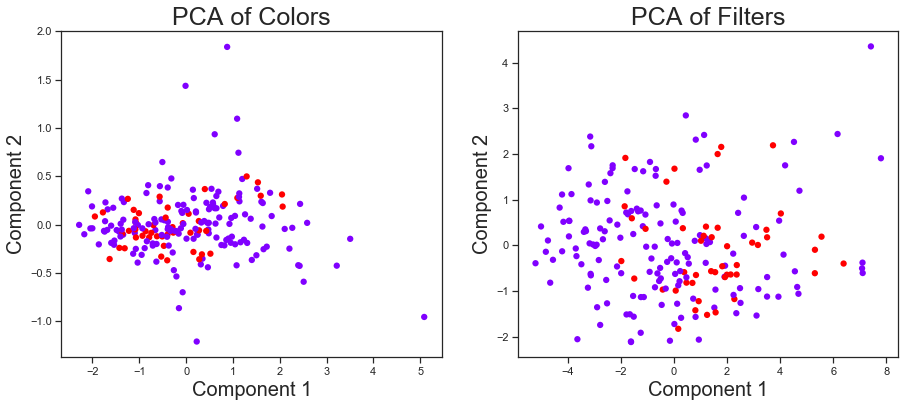

In [1384]:
figure(figsize=(15,6))
subplot(121)
plt.scatter(projected_color[:, 0], projected_color[:, 1],
            c=data['Label'], edgecolor='none', alpha=1, s=40, cmap='rainbow')
plt.xlabel('Component 1', fontsize=20)
plt.ylabel('Component 2', fontsize=20)
# plt.colorbar();
title('PCA of Colors', fontsize=25)
subplot(122)
plt.scatter(projected_filter[:, 0], projected_filter[:, 1],
            c=data['Label'], edgecolor='none', alpha=1, s=40, cmap='rainbow')
plt.xlabel('Component 1', fontsize=20)
plt.ylabel('Component 2', fontsize=20)
title('PCA of Filters', fontsize=25)
savefig('pca.png',  dpi=200)
show()

In [1379]:
from sklearn.cluster import KMeans

In [1380]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(projected_filter)
center = Kmean.cluster_centers_

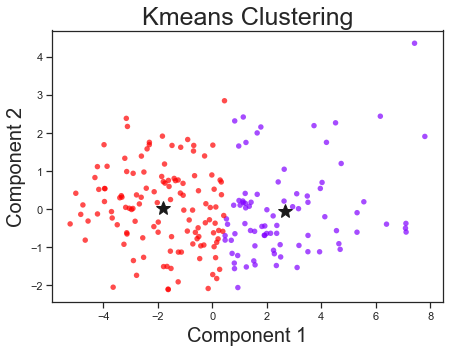

In [1382]:
figure(figsize=(7,5))
plt.scatter(projected_filter[:, 0], projected_filter[:, 1],
            c=Kmean.labels_, edgecolor='none', alpha=0.7, s=30, cmap='rainbow')
plot(center[0,0], center[0,1], '*', markersize=15, c='k')
plot(center[1,0], center[1,1], '*', markersize=15, c='k')
plt.xlabel('Component 1', fontsize=20)
plt.ylabel('Component 2', fontsize=20)
# plt.colorbar();
title('Kmeans Clustering', fontsize=25)
savefig('Kmean.png', dpi=200)
show()

In [1473]:
data_full = pd.DataFrame(columns=HSC_filters['Label']) # Make sure this df includes the filters we're interested in
for i in range(len(WF_475)): #74 stars have 475W filters
# for i in [1,10,20]:
    cor =neugent[WF_475[i]][0] 
    cor_search = cor[1:3] + 'h' + cor[3:5] + 'm' + cor[5:10] +'s' + ' ' + cor[10:13] +'d' + cor[13:15] +'m' + cor[15:] +'s'
    c = coordinates.SkyCoord(cor_search, frame='icrs')
    
    if i % 5==0:
        print('Done with:', i)
    for r in [0.5,1.5]:
        data = Catalogs.query_region(c, catalog="HSC", radius = r*u.arcsecond)
        df = data.to_pandas()

        WF_pos = np.argmin(abs(df['A_F475W'] - double(neugent[WF_475[i]][3]))) #locate the WF star
        label = np.zeros(len(data), int) # label
        pos = np.zeros(len(data), int) # position in 150 star
        ra = np.zeros(len(data)) # ra 
        dec = np.zeros(len(data)) # dec
        Va = np.zeros(len(data)) # Va
        B_Va = np.zeros(len(data)) # B-Va
#         print(WF_pos)
        if r ==0.5:
            ra[WF_pos] = double(c.to_string('decimal').split(' ')[0])
            dec[WF_pos] = double(c.to_string('decimal').split(' ')[1])
            Va[WF_pos] = double(neugent[WF_475[i]][3])
            B_Va[WF_pos] = double(neugent[WF_475[i]][4])
            label[WF_pos] = 1
            pos[:] = WF_475[i]

        df['NeugentRA'] = ra
        df['NeugentDec'] = dec
        df['Va'] = Va
        df['B_Va'] = B_Va
        df['Label'] = label
        df['Position'] = pos
        fc = df.keys()
        if 'A_F625W' in fc and 'A_F658N' in fc and 'A_F475W' in fc:
#         if 'A_F475W' in fc and 'W3_F110W' in fc and 'A_F625W' in fc:

            data_full = pd.concat([data_full,df], axis=0, join='inner')
    #         ID_6[WF_475[i]] = int(df.iloc[WF_pos]['MatchID']) 
data_6allstar = data_full.drop_duplicates(subset='MatchID').dropna()

Done with: 0
Done with: 5
Done with: 10
Done with: 15
Done with: 20
Done with: 25
Done with: 30
Done with: 35
Done with: 40
Done with: 45
Done with: 50
Done with: 55
Done with: 60
Done with: 65
Done with: 70
Done with: 75


In [1496]:
len(np.array(np.where(data_6allstar['Label']==1)[0]))

30

In [1497]:
data = data_6allstar.copy()
data.describe()

,NeugentRA,NeugentDec,Va,B_Va,A_F475W,A_F475W_MAD,A_F625W,A_F625W_MAD,A_F658N,A_F658N_MAD,A_F814W,A_F814W_MAD,CI,CI_Sigma,DSigma,Distance,Extinction,KronRadius,KronRadius_Sigma,MatchDec,MatchRA
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,1.082038,4.017926,1.985452,-0.012452,23.448903,0.023977,22.689803,0.007881,22.396557,0.010011,22.339305,0.017293,1.340375,0.195654,18.373309,0.020410,0.362260,0.305027,0.113502,41.462256,11.101328
std,3.311344,12.294960,6.083521,0.070961,1.771118,0.037906,1.302566,0.019709,1.214993,0.028180,1.154838,0.019638,0.269094,0.130876,13.580965,0.009033,0.076147,0.072831,0.091126,0.173537,0.177907
min,0.000000,0.000000,0.000000,-0.410000,18.433500,0.000000,18.103800,0.000000,18.033899,0.000000,18.077149,0.000000,0.932207,0.028756,2.631493,0.001358,0.197081,0.168450,0.000000,41.300354,10.853254
25%,0.000000,0.000000,0.000000,0.000000,22.291900,0.005813,22.174100,0.000000,21.916325,0.000000,21.661625,0.005162,1.113434,0.095642,8.454021,0.014341,0.321675,0.253707,0.029479,41.316213,10.923491
50%,0.000000,0.000000,0.000000,0.000000,24.122600,0.013725,23.066100,0.000000,22.832050,0.000000,22.446800,0.011499,1.280565,0.162154,13.241247,0.022668,0.382519,0.296387,0.109040,41.395605,11.106035
75%,0.000000,0.000000,0.000000,0.000000,24.727700,0.029800,23.514300,0.000000,23.235375,0.000000,23.038312,0.022601,1.546289,0.256545,25.207828,0.027899,0.421057,0.356485,0.178810,41.548331,11.254138
max,11.436000,41.926000,22.770000,0.220000,26.238501,0.530050,25.290001,0.107050,26.092400,0.193049,25.582899,0.162800,2.235489,0.745466,71.783068,0.033313,0.474245,0.476900,0.370899,41.926505,11.436720


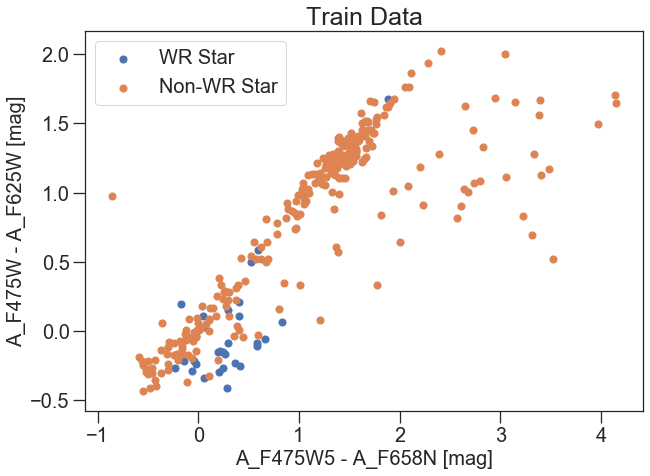

In [1506]:
W475_W625 = data['A_F475W'] - data['A_F658N']
W475_W658 = data['A_F475W'] - data['A_F625W']

fig1 = plt.figure(figsize=(10,7))
WR = np.where(np.array(data['Label'])==1)[0]
NonWR = np.where(np.array(data['Label'])==0)[0]
scatter(W475_W625.iloc[WR],W475_W658.iloc[WR],s=50, alpha=1, label='WR Star')
scatter(W475_W625.iloc[NonWR],W475_W658.iloc[NonWR],s=50, alpha=1, label='Non-WR Star')
plt.xlabel('A_F475W5 - A_F658N [mag]', fontsize=20)
plt.ylabel('A_F475W - A_F625W [mag]', fontsize=20)
xticks(fontsize=20)
yticks(fontsize=20)
plt.tick_params('both', length=12, width=1.3, which='major')
legend(fontsize=20)
title('Train Data', fontsize=25)
savefig('NarrowFilter.png', dpi=200)
show()

In [1517]:
train = pd.DataFrame()
train['W475_W625'] = data['A_F475W'] - data['A_F625W']
train['W475_W658'] = data['A_F475W'] - data['A_F658N']


In [1518]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train,np.array(data['Label'], dtype=int))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [1519]:
y_pred = model.predict(train)
print("Accuracy:",metrics.accuracy_score(np.array(data['Label'], dtype=int), y_pred))

Accuracy: 0.9483870967741935


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       280
           1       0.82      0.60      0.69        30

    accuracy                           0.95       310
   macro avg       0.89      0.79      0.83       310
weighted avg       0.94      0.95      0.94       310



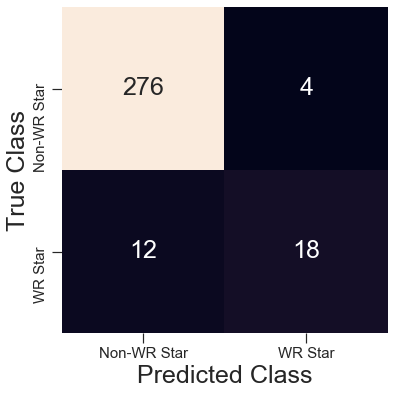

In [1520]:
print(classification_report(np.array(data['Label'], dtype=int), y_pred))
mat = confusion_matrix(np.array(data['Label'], dtype=int), y_pred)
fig1c = plt.figure(figsize=(6,6))
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', xticklabels=['Non-WR Star','WR Star'], 
            yticklabels=['Non-WR Star', 'WR Star'])
plt.xlabel('Predicted Class', fontsize=25)
plt.ylabel('True Class', fontsize=25)
plt.tick_params('both', length=10, width=1.2, which='major', labelsize=15)
savefig('KNN_narrowfilter.png', dpi=200)

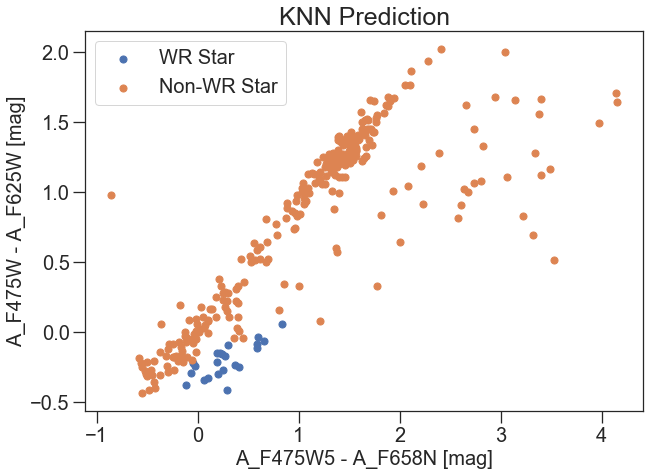

In [1521]:
fig1 = plt.figure(figsize=(10,7))
WR = np.where(y_pred==1)[0]
NonWR = np.where(y_pred==0)[0]
scatter(W475_W625.iloc[WR],W475_W658.iloc[WR],s=50, alpha=1, label='WR Star')
scatter(W475_W625.iloc[NonWR],W475_W658.iloc[NonWR],s=50, alpha=1, label='Non-WR Star')
plt.xlabel('A_F475W5 - A_F658N [mag]', fontsize=20)
plt.ylabel('A_F475W - A_F625W [mag]', fontsize=20)
xticks(fontsize=20)
yticks(fontsize=20)
plt.tick_params('both', length=12, width=1.3, which='major')
legend(fontsize=20)
title('KNN Prediction', fontsize=25)
savefig('KNN_narrow.png', dpi=200)
show()

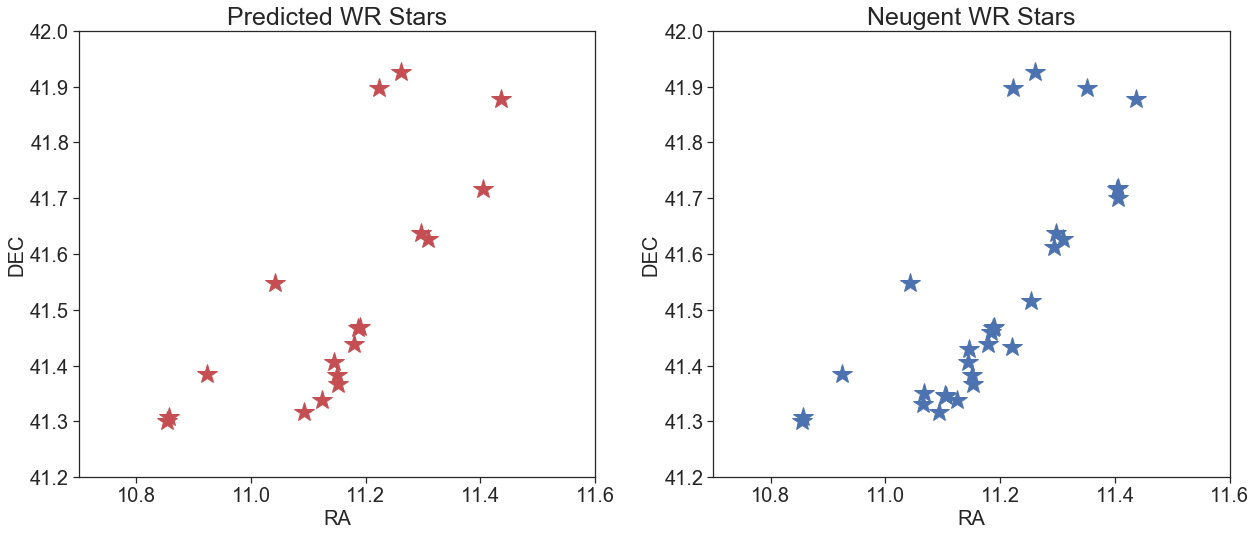

In [1531]:
WR_pred = np.where(y_pred==1)[0]

star_pos = []
for i in np.where(data['Label']==1)[0]:
    if i in WR_pred:
        star_pos.append(i)
        
RA_pred = data['MatchRA'].iloc[star_pos]
Dec_pred = data['MatchDec'].iloc[star_pos]

WR_test = np.where(data['Label']==1)[0]
RA_test = data['MatchRA'].iloc[WR_test]
Dec_test = data['MatchDec'].iloc[WR_test]


figure(figsize=(18,8))

subplot(121)
plot(RA_pred, Dec_pred ,'*',color='r', markersize=20)#, alpha=0.5)
xticks(fontsize=15)
yticks(fontsize=15)
xlabel('RA', fontsize=20)
xlim([10.7, 11.6])
ylim([41.2,42])
ylabel('DEC', fontsize=20)
title('Predicted WR Stars', fontsize=25)
xticks(fontsize=20)
yticks(fontsize=20)

subplot(122)
plot(RA_test, Dec_test ,'*',color='b', markersize=20)#, alpha=0.5)
xlim([10.7, 11.6])
ylim([41.2,42])
xticks(fontsize=20)
yticks(fontsize=20)
xlabel('RA', fontsize=20)
ylabel('DEC', fontsize=20)
title('Neugent WR Stars', fontsize=25)
tight_layout()
savefig('PredictedPosition.png', dpi=200)
show()

In [1472]:
# figure(figsize=(10,8))
# id_WR = np.where(data['Label']==1)[0]
# id_nonWR = np.where(data['Label']==0)[0]
# plot(data['MatchRA'].iloc[id_nonWR], data['MatchDec'].iloc[id_nonWR], '*', color='b', alpha=1, markersize=15, label='Non-WR Star')
# plot(data['MatchRA'].iloc[id_WR], data['MatchDec'].iloc[id_WR], '*', color='orange', alpha=1, markersize=15, label='WR Star')

# xticks(fontsize=15)
# yticks(fontsize=15)
# xlabel('Ra', fontsize=20)
# ylabel('Dec', fontsize=20)
# title('Star Position', fontsize=30)
# legend(fontsize=20)
# savefig('Star Position.png', dpi=200)
# show()